In [1]:
df2 = pd.read_excel('F1B_AfterEDA.xlsx')

In [2]:
df2.dtypes

CASE_STATUS               int64
TOTAL_WORKERS             int64
FULL_TIME_POSITION       object
PREVAILING_WAGE         float64
PW_UNIT_OF_PAY           object
PW_SOURCE_YEAR            int64
H-1B_DEPENDENT           object
WILLFUL_VIOLATOR         object
CS_DD_Duration            int64
Emp_Stay_Duration_Yr      int64
EMPLOYER_FREQUENCY        int64
AGENT_ATTORNEY            int64
OCCUPATION               object
PWGrWGFm                 object
dtype: object

In [3]:
df2['CASE_STATUS'] = df2['CASE_STATUS'].astype('object')
df2['PW_SOURCE_YEAR'] = df2['PW_SOURCE_YEAR'].astype('object')
df2['CS_DD_Duration'] = df2['CS_DD_Duration'].astype('object')
df2['Emp_Stay_Duration_Yr'] = df2['Emp_Stay_Duration_Yr'].astype('object')
df2['AGENT_ATTORNEY'] = df2['AGENT_ATTORNEY'].astype('object')

In [4]:
from sklearn.preprocessing import normalize
from scipy import stats

In [5]:
df1 = df2.copy()

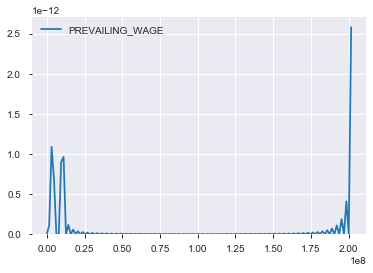

In [6]:
sns.kdeplot(df1['PREVAILING_WAGE'])

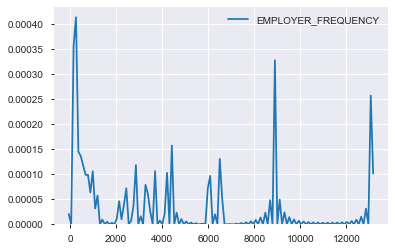

In [7]:
sns.kdeplot(df1['EMPLOYER_FREQUENCY'])

In [8]:
from scipy import stats

(array([2.68120e+04, 3.59557e+05, 1.70000e+01, 3.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([  2.56363607,  49.57175327,  96.57987046, 143.58798766,
        190.59610486, 237.60422205, 284.61233925, 331.62045645,
        378.62857365, 425.63669084, 472.64480804]),
 <a list of 10 Patch objects>)

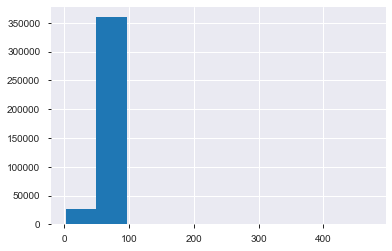

In [9]:
a = df1['PREVAILING_WAGE'].values
tags_ratio = stats.boxcox(a, 0.25)
plt.hist(tags_ratio)

(array([119786.,  98118.,  58576.,  24336.,  19621.,   2100.,  20701.,
          8583.,  21467.,  13103.]),
 array([ 0.        ,  3.87959505,  7.7591901 , 11.63878515, 15.5183802 ,
        19.39797525, 23.2775703 , 27.15716535, 31.0367604 , 34.91635546,
        38.79595051]),
 <a list of 10 Patch objects>)

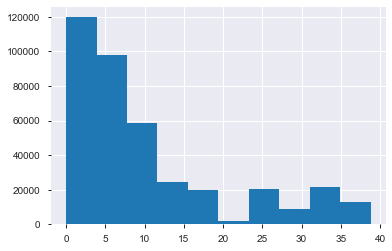

In [10]:
a = df1['EMPLOYER_FREQUENCY'].values
tags_ratio1 = stats.boxcox(a, 0.25)
plt.hist(tags_ratio1)

In [11]:
df1['PREVAILING_WAGE'] = tags_ratio
df1['EMPLOYER_FREQUENCY'] = tags_ratio1

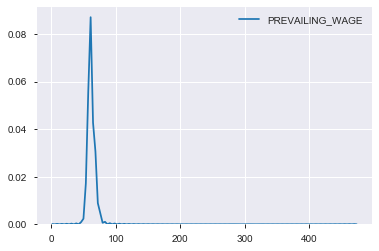

In [12]:
sns.kdeplot(df1['PREVAILING_WAGE'])

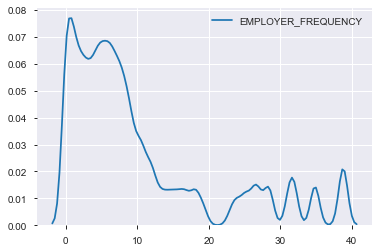

In [13]:
sns.kdeplot(df1['EMPLOYER_FREQUENCY'])

In [14]:
df1.dtypes

CASE_STATUS              object
TOTAL_WORKERS             int64
FULL_TIME_POSITION       object
PREVAILING_WAGE         float64
PW_UNIT_OF_PAY           object
PW_SOURCE_YEAR           object
H-1B_DEPENDENT           object
WILLFUL_VIOLATOR         object
CS_DD_Duration           object
Emp_Stay_Duration_Yr     object
EMPLOYER_FREQUENCY      float64
AGENT_ATTORNEY           object
OCCUPATION               object
PWGrWGFm                 object
dtype: object

# CREATING MODEL

In [15]:
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import confusion_matrix,classification_report,matthews_corrcoef,cohen_kappa_score,roc_auc_score,accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score

In [16]:
df1['CASE_STATUS'] = df1.CASE_STATUS.astype('int')

In [17]:
X = df1.drop(['CASE_STATUS','TOTAL_WORKERS'],axis=1)
y = df1.CASE_STATUS

In [18]:
X_dummy = pd.get_dummies(X)

In [19]:
X_dummy.head()

,PREVAILING_WAGE,EMPLOYER_FREQUENCY,FULL_TIME_POSITION_N,FULL_TIME_POSITION_Y,PW_UNIT_OF_PAY_Hour,PW_UNIT_OF_PAY_Year,PW_SOURCE_YEAR_1998,PW_SOURCE_YEAR_2000,PW_SOURCE_YEAR_2001,PW_SOURCE_YEAR_2007,...,OCCUPATION_Computer Occupations,OCCUPATION_Education Occupations,OCCUPATION_Financial Occupation,OCCUPATION_Management Occupation,OCCUPATION_Marketing Occupation,OCCUPATION_Mathematical Occupations,OCCUPATION_Medical Occupations,OCCUPATION_Others,PWGrWGFm_N,PWGrWGFm_Y
0,69.487232,5.995998,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,54.215593,0.756828,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,60.463209,3.595316,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,72.457150,3.444839,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,70.100077,1.981395,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [20]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_dummy,y,test_size=0.3,random_state=3,stratify=y)

### Scaling 

In [21]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

In [22]:
xtrain_scaled = pd.DataFrame(ms.fit_transform(xtrain),columns = xtrain.columns)

In [23]:
xtest_scaled = pd.DataFrame(ms.transform(xtest),columns = xtest.columns)

In [24]:
xtrain_scaled.head()

,PREVAILING_WAGE,EMPLOYER_FREQUENCY,FULL_TIME_POSITION_N,FULL_TIME_POSITION_Y,PW_UNIT_OF_PAY_Hour,PW_UNIT_OF_PAY_Year,PW_SOURCE_YEAR_1998,PW_SOURCE_YEAR_2000,PW_SOURCE_YEAR_2001,PW_SOURCE_YEAR_2007,...,OCCUPATION_Computer Occupations,OCCUPATION_Education Occupations,OCCUPATION_Financial Occupation,OCCUPATION_Management Occupation,OCCUPATION_Marketing Occupation,OCCUPATION_Mathematical Occupations,OCCUPATION_Medical Occupations,OCCUPATION_Others,PWGrWGFm_N,PWGrWGFm_Y
0,0.265536,0.092672,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.270040,0.464420,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.265867,0.281190,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.235961,0.152884,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.257928,0.092672,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [84]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()
from xgboost.sklearn import XGBClassifier
xgb = XGBClassifier()
from sklearn.ensemble import BaggingClassifier
bg = BaggingClassifier()

In [26]:
from sklearn.model_selection import cross_val_score

In [27]:
import warnings
warnings.filterwarnings("ignore")

# Model on base data

### Logistic Regression

##### Without threshold

In [28]:
y_pred_lr  = lg.fit(xtrain_scaled,ytrain).predict(xtest)
test_lr = round(accuracy_score(ytest,y_pred_lr), 4)
train_lr = round(lg.score(xtrain_scaled,ytrain), 4)

precision,recall,fscore,support=score(ytest,y_pred_lr,average='macro')

pre_lr = round(precision, 4)
re_lr = round(recall, 4)
f1_lr = round(fscore, 4)


probs = lg.predict_proba(xtest_scaled)
probability = probs[:,1]
auc_lr = roc_auc_score(ytest,probability)

cv_lr = np.mean(cross_val_score(lg,xtrain_scaled,ytrain,cv=5))

print ('Train Accuracy:',train_lr )
print ('Test Accuracy:',test_lr )
print('Validation Score:',cv_lr)
print('Classification Report\n',classification_report(ytest,y_pred_lr))
print('Confusion Matrix\n',confusion_matrix(ytest,y_pred_lr))

Train Accuracy: 0.9934
Test Accuracy: 0.1593
Validation Score: 0.9933782660318803
Classification Report
               precision    recall  f1-score   support

           0       0.01      0.94      0.03      1523
           1       1.00      0.15      0.26    114395

    accuracy                           0.16    115918
   macro avg       0.50      0.55      0.14    115918
weighted avg       0.98      0.16      0.26    115918

Confusion Matrix
 [[ 1438    85]
 [97369 17026]]


##### With threshold

In [29]:
def adjusted_classes(y_scores, t):
    return [1 if y >= t else 0 for y in y_scores]

In [30]:
mlr = lg.fit(xtrain_scaled,ytrain)
y_score_lgt = mlr.predict_proba(xtest_scaled)[:, 1]
y_pred_lrt = adjusted_classes(y_score_lgt, 0.9)

test_lrt = round(accuracy_score(ytest,y_pred_lr), 4)
train_lrt = round(lg.score(xtrain_scaled,ytrain), 4)

precision,recall,fscore,support=score(ytest,y_pred_lrt,average='macro')

pre_lrt = round(precision, 4)
re_lrt = round(recall, 4)
f1_lrt = round(fscore, 4)

probs = lg.predict_proba(xtest_scaled)
probability = probs[:,1]
auc_lrt = roc_auc_score(ytest,probability)

cv_lrt = np.mean(cross_val_score(lg,xtrain_scaled,ytrain,cv=5))

print ('Train Accuracy with threshold:',train_lrt )
print ('Test Accuracy  with threshold:',test_lrt )
print('Validation Score:',cv_lrt)
print('Classification Report  with threshold\n',classification_report(ytest,y_pred_lrt))
print('Confusion Matrix  with threshold\n',confusion_matrix(ytest,y_pred_lrt))

Train Accuracy with threshold: 0.9934
Test Accuracy  with threshold: 0.1593
Validation Score: 0.9933782660318803
Classification Report  with threshold
               precision    recall  f1-score   support

           0       0.65      0.56      0.60      1523
           1       0.99      1.00      1.00    114395

    accuracy                           0.99    115918
   macro avg       0.82      0.78      0.80    115918
weighted avg       0.99      0.99      0.99    115918

Confusion Matrix  with threshold
 [[   858    665]
 [   470 113925]]


### Decision Tree

In [31]:
y_pred_dtree  = dtree.fit(xtrain_scaled,ytrain).predict(xtest)
test_dtree = round(accuracy_score(ytest,y_pred_dtree), 4)
train_dtree = round(dtree.score(xtrain_scaled,ytrain), 4)

precision,recall,fscore,support=score(ytest,y_pred_dtree,average='macro')

pre_dtree = round(precision, 4)
re_dtree = round(recall, 4)
f1_dtree = round(fscore, 4)


probs = dtree.predict_proba(xtest_scaled)
probability = probs[:,1]
auc_dtree = roc_auc_score(ytest,probability)

cv_dtree = np.mean(cross_val_score(dtree,xtrain_scaled,ytrain,cv=5))

print ('Train Accuracy:',train_dtree )
print ('Test Accuracy:',test_dtree )
print('Validation Score:',cv_dtree)
print('Classification Report\n',classification_report(ytest,y_pred_dtree))
print('Confusion Matrix\n',confusion_matrix(ytest,y_pred_dtree))

Train Accuracy: 0.9985
Test Accuracy: 0.0928
Validation Score: 0.9885459928263028
Classification Report
               precision    recall  f1-score   support

           0       0.01      0.93      0.03      1523
           1       0.99      0.08      0.15    114395

    accuracy                           0.09    115918
   macro avg       0.50      0.51      0.09    115918
weighted avg       0.98      0.09      0.15    115918

Confusion Matrix
 [[  1421    102]
 [105057   9338]]


### KNN

##### Knn with 3 neighbors

In [32]:
knn3 = KNeighborsClassifier(n_neighbors=3)
y_pred_knn3  = knn3.fit(xtrain_scaled,ytrain).predict(xtest)
test_knn3 = round(accuracy_score(ytest,y_pred_knn3), 4)
train_knn3 = round(knn3.score(xtrain_scaled,ytrain), 4)

precision,recall,fscore,support=score(ytest,y_pred_knn3,average='macro')

pre_knn3 = round(precision, 4)
re_knn3 = round(recall, 4)
f1_knn3 = round(fscore, 4)


probs = knn3.predict_proba(xtest_scaled)
probability = probs[:,1]
auc_knn3 = roc_auc_score(ytest,probability)

cv_knn3 = np.mean(cross_val_score(knn3,xtrain_scaled,ytrain,cv=5))

print ('Train Accuracy:',train_knn3 )
print ('Test Accuracy:',test_knn3 )
print('Validation Score:',cv_knn3)
print('Classification Report\n',classification_report(ytest,y_pred_knn3))
print('Confusion Matrix\n',confusion_matrix(ytest,y_pred_knn3))

Train Accuracy: 0.9939
Test Accuracy: 0.2163
Validation Score: 0.991707120638606
Classification Report
               precision    recall  f1-score   support

           0       0.01      0.87      0.03      1523
           1       0.99      0.21      0.34    114395

    accuracy                           0.22    115918
   macro avg       0.50      0.54      0.19    115918
weighted avg       0.98      0.22      0.34    115918

Confusion Matrix
 [[ 1327   196]
 [90653 23742]]


##### knn with 5 neighbors

In [33]:
knn5 = KNeighborsClassifier(n_neighbors=5)
y_pred_knn5  = knn5.fit(xtrain_scaled,ytrain).predict(xtest)
test_knn5 = round(accuracy_score(ytest,y_pred_knn5), 4)
train_knn5 = round(knn5.score(xtrain_scaled,ytrain), 4)

precision,recall,fscore,support=score(ytest,y_pred_knn5,average='macro')

pre_knn5 = round(precision, 4)
re_knn5 = round(recall, 4)
f1_knn5 = round(fscore, 4)


probs = knn5.predict_proba(xtest_scaled)
probability = probs[:,1]
auc_knn5 = roc_auc_score(ytest,probability)

cv_knn5 = np.mean(cross_val_score(knn5,xtrain_scaled,ytrain,cv=5))

print ('Train Accuracy:',train_knn5 )
print ('Test Accuracy:',test_knn5 )
print('Validation Score:',cv_knn5)
print('Classification Report\n',classification_report(ytest,y_pred_knn5))
print('Confusion Matrix\n',confusion_matrix(ytest,y_pred_knn5))

Train Accuracy: 0.993
Test Accuracy: 0.2229
Validation Score: 0.9917366980285347
Classification Report
               precision    recall  f1-score   support

           0       0.01      0.86      0.03      1523
           1       0.99      0.21      0.35    114395

    accuracy                           0.22    115918
   macro avg       0.50      0.54      0.19    115918
weighted avg       0.98      0.22      0.35    115918

Confusion Matrix
 [[ 1307   216]
 [89859 24536]]


## Ensemble Methods

### Random Forest

In [32]:
y_pred_rf  = rf.fit(xtrain_scaled,ytrain).predict(xtest)
test_rf = round(accuracy_score(ytest,y_pred_rf), 4)
train_rf = round(rf.score(xtrain_scaled,ytrain), 4)

precision,recall,fscore,support=score(ytest,y_pred_rf,average='macro')

pre_rf = round(precision, 4)
re_rf = round(recall, 4)
f1_rf = round(fscore, 4)


probs = rf.predict_proba(xtest_scaled)
probability = probs[:,1]
auc_rf = roc_auc_score(ytest,probability)

cv_rf = np.mean(cross_val_score(rf,xtrain_scaled,ytrain,cv=5))

print ('Train Accuracy:',train_rf )
print ('Test Accuracy:',test_rf )
print('Validation Score:',cv_rf)
print('Classification Report\n',classification_report(ytest,y_pred_rf))
print('Confusion Matrix\n',confusion_matrix(ytest,y_pred_rf))


Train Accuracy: 0.998
Test Accuracy: 0.7583
Validation Score: 0.9917699748733085
Classification Report
               precision    recall  f1-score   support

           0       0.03      0.58      0.06      1523
           1       0.99      0.76      0.86    114395

    accuracy                           0.76    115918
   macro avg       0.51      0.67      0.46    115918
weighted avg       0.98      0.76      0.85    115918

Confusion Matrix
 [[  889   634]
 [27386 87009]]


### Bagging Classifier

In [33]:
y_pred_bg  = bg.fit(xtrain_scaled,ytrain).predict(xtest)
test_bg = round(accuracy_score(ytest,y_pred_bg), 4)
train_bg = round(bg.score(xtrain_scaled,ytrain), 4)

precision,recall,fscore,support=score(ytest,y_pred_bg,average='macro')

pre_bg = round(precision, 4)
re_bg = round(recall, 4)
f1_bg = round(fscore, 4)


probs = bg.predict_proba(xtest_scaled)
probability = probs[:,1]
auc_bg = roc_auc_score(ytest,probability)

cv_bg = np.mean(cross_val_score(bg,xtrain_scaled,ytrain,cv=5))

print ('Train Accuracy:',train_bg )
print ('Test Accuracy:',test_bg )
print('Validation Score:',cv_bg)
print('Classification Report\n',classification_report(ytest,y_pred_bg))
print('Confusion Matrix\n',confusion_matrix(ytest,y_pred_bg))

Train Accuracy: 0.998
Test Accuracy: 0.0878
Validation Score: 0.9918734960456236
Classification Report
               precision    recall  f1-score   support

           0       0.01      0.94      0.03      1523
           1       0.99      0.08      0.14    114395

    accuracy                           0.09    115918
   macro avg       0.50      0.51      0.08    115918
weighted avg       0.98      0.09      0.14    115918

Confusion Matrix
 [[  1437     86]
 [105654   8741]]


### Gradient Boosting Classifier

In [34]:
y_pred_gbm  = gbm.fit(xtrain_scaled,ytrain).predict(xtest)
test_gbm = round(accuracy_score(ytest,y_pred_gbm), 4)
train_gbm = round(gbm.score(xtrain_scaled,ytrain), 4)

precision,recall,fscore,support=score(ytest,y_pred_gbm,average='macro')

pre_gbm = round(precision, 4)
re_gbm = round(recall, 4)
f1_gbm = round(fscore, 4)


probs = gbm.predict_proba(xtest_scaled)
probability = probs[:,1]
auc_gbm = roc_auc_score(ytest,probability)

cv_gbm = np.mean(cross_val_score(gbm,xtrain_scaled,ytrain,cv=5))

print ('Train Accuracy:',train_gbm )
print ('Test Accuracy:',test_gbm )
print('Validation Score:',cv_gbm)
print('Classification Report\n',classification_report(ytest,y_pred_gbm))
print('Confusion Matrix\n',confusion_matrix(ytest,y_pred_gbm))

Train Accuracy: 0.9937
Test Accuracy: 0.224
Validation Score: 0.9935705225179751
Classification Report
               precision    recall  f1-score   support

           0       0.01      0.89      0.03      1523
           1       0.99      0.22      0.35    114395

    accuracy                           0.22    115918
   macro avg       0.50      0.55      0.19    115918
weighted avg       0.98      0.22      0.35    115918

Confusion Matrix
 [[ 1351   172]
 [89780 24615]]


In [90]:
models_with_base_data = {
'Logistic Regression' :{'Train Accuracy': train_lr , 'Test Accuracy': test_lr , 'Validation Score' : cv_lr , 
                        'Precision' : pre_lr , 'Recall' : re_lr , 'F1 Score' : f1_lr , 'AUC Score': auc_lr },
'Logistic Regression with threshold' :{'Train Accuracy': train_lrt , 'Test Accuracy': test_lrt , 'Validation Score' : cv_lrt , 
                        'Precision' : pre_lrt , 'Recall' : re_lrt , 'F1 Score' : f1_lrt , 'AUC Score': auc_lrt },
'Decision Tree' : {'Train Accuracy': train_dtree , 'Test Accuracy': test_dtree , 'Validation Score' : cv_dtree , 
                        'Precision' : pre_dtree , 'Recall' : re_dtree , 'F1 Score' : f1_dtree , 'AUC Score': auc_dtree },
'KNN3' : {'Train Accuracy': train_knn3 , 'Test Accuracy': test_knn3 , 'Validation Score' : cv_knn3 , 
                        'Precision' : pre_knn3 , 'Recall' : re_knn3 , 'F1 Score' : f1_knn3 , 'AUC Score': auc_knn3 },
'KNN5' : {'Train Accuracy': train_knn5 , 'Test Accuracy': test_knn5 , 'Validation Score' : cv_knn5 , 
                        'Precision' : pre_knn5 , 'Recall' : re_knn5 , 'F1 Score' : f1_knn5 , 'AUC Score': auc_knn5 },
'Random Forest' : {'Train Accuracy': train_rf , 'Test Accuracy': test_rf , 'Validation Score' : cv_rf , 
                        'Precision' : pre_rf , 'Recall' : re_rf , 'F1 Score' : f1_rf , 'AUC Score': auc_rf },
'Bagging' : {'Train Accuracy': train_bg , 'Test Accuracy': test_bg , 'Validation Score' : cv_bg , 
                        'Precision' : pre_bg , 'Recall' : re_bg , 'F1 Score' : f1_bg , 'AUC Score': auc_bg },
'Gradient Boosting' : {'Train Accuracy': train_gbm , 'Test Accuracy': test_gbm , 'Validation Score' : cv_gbm , 
                        'Precision' : pre_gbm , 'Recall' : re_gbm , 'F1 Score' : f1_gbm , 'AUC Score': auc_gbm }
 }


In [91]:
models_with_base_data = pd.DataFrame(models_with_base_data)
models_with_base_data

,Logistic Regression,Logistic Regression with threshold,Decision Tree,KNN3,KNN5,Random Forest,Bagging,Gradient Boosting
AUC Score,0.919617,0.919617,0.784339,0.7898,0.8043,0.832842,0.832745,0.927926
F1 Score,0.143800,0.798500,0.088600,0.1858,0.1904,0.460500,0.084200,0.191400
Precision,0.504800,0.820100,0.501300,0.5031,0.5028,0.512100,0.501800,0.503900
Recall,0.546500,0.779600,0.507300,0.5394,0.5363,0.672200,0.510000,0.551100
Test Accuracy,0.159300,0.159300,0.092800,0.2163,0.2229,0.758300,0.087800,0.224000
Train Accuracy,0.993400,0.993400,0.998500,0.9939,0.9930,0.998000,0.998000,0.993700
Validation Score,0.993378,0.993378,0.988546,0.9917,0.9917,0.991770,0.991873,0.993571


## Over Sampling

In [35]:
xtrain1,xvaldn,ytrain1,yvaldn = train_test_split(xtrain_scaled,ytrain,test_size=0.2,random_state=0,stratify=ytrain)

In [36]:
from imblearn.over_sampling import SMOTE
s = SMOTE('minority')

In [37]:
xtrain_sampled,ytrain_sampled = s.fit_sample(xtrain1,ytrain1)
xvaldn_sampled,yvaldn_sampled = s.fit_sample(xvaldn,yvaldn)

xtrain = xtrain_sampled - training data
ytrain = ytrain_sampled - training data
xtest = xvaldn_sampled - validation data
ytest = yvaldn_sampled - validation data
xtest_scaled           - xtest data
ytest                  - ytest data  

In [38]:
print("The count of 1's is",sum(ytrain1==1))
print("The count of 0's is",sum(ytrain1==0))
print("The count of 1's is",sum(ytrain_sampled==1))
print("The count of 0's is",sum(ytrain_sampled==0))

The count of 1's is 213536
The count of 0's is 2842
The count of 1's is 213536
The count of 0's is 213536


In [39]:
print("The count of 1's is",sum(yvaldn==1))
print("The count of 0's is",sum(yvaldn==0))
print("The count of 1's is",sum(yvaldn_sampled==1))
print("The count of 0's is",sum(yvaldn_sampled==0))

The count of 1's is 53384
The count of 0's is 711
The count of 1's is 53384
The count of 0's is 53384


In [40]:
from sklearn.model_selection import GridSearchCV

### Logistic Regression

###### train - validation

In [42]:
model  = lg.fit(xtrain_sampled, ytrain_sampled )
y_pred_lrs = model.predict(xvaldn_sampled)
test_lrs = round(accuracy_score(yvaldn_sampled,y_pred_lrs), 4)
train_lrs = round(model.score(xtrain_sampled,ytrain_sampled), 4)

precision,recall,fscore,support=score(yvaldn_sampled,y_pred_lrs,average='macro')

pre_lrs = round(precision, 4)
re_lrs = round(recall, 4)
f1_lrs = round(fscore, 4)


probs = lg.predict_proba(xvaldn_sampled)
probability = probs[:,1]
auc_lrs = roc_auc_score(yvaldn_sampled,probability)

cv_lrs = np.mean(cross_val_score(lg,xtrain_sampled,ytrain_sampled,cv=5))

print ('Train Accuracy:',train_lrs )
print ('Validation Data Accuracy:',test_lrs )
print('Validation Score:',cv_lrs)
print('Classification Report\n',classification_report(yvaldn_sampled,y_pred_lrs))
print('Confusion Matrix\n',confusion_matrix(yvaldn_sampled,y_pred_lrs))

Train Accuracy: 0.8531
Test Accuracy: 0.8717
Validation Score: 0.8530552191703069
Classification Report
               precision    recall  f1-score   support

           0       0.91      0.82      0.87     53384
           1       0.84      0.92      0.88     53384

    accuracy                           0.87    106768
   macro avg       0.88      0.87      0.87    106768
weighted avg       0.88      0.87      0.87    106768

Confusion Matrix
 [[43988  9396]
 [ 4304 49080]]


###### test

In [44]:
y_pred_lrs_test = model.predict(xtest_scaled)
test_lrs_test = round(accuracy_score(ytest,y_pred_lrs_test), 4)

precision,recall,fscore,support=score(ytest,y_pred_lrs_test,average='macro')

pre_lrs_test = round(precision, 4)
re_lrs_test = round(recall, 4)
f1_lrs_test = round(fscore, 4)


probs = lg.predict_proba(xtest_scaled)
probability = probs[:,1]
auc_lrs_test = roc_auc_score(ytest,probability)

print ('Test Accuracy:',test_lrs_test )
print('Classification Report\n',classification_report(ytest,y_pred_lrs_test))
print('Confusion Matrix\n',confusion_matrix(ytest,y_pred_lrs_test))

Test Accuracy: 0.9173
Classification Report
               precision    recall  f1-score   support

           0       0.11      0.77      0.20      1523
           1       1.00      0.92      0.96    114395

    accuracy                           0.92    115918
   macro avg       0.55      0.85      0.58    115918
weighted avg       0.99      0.92      0.95    115918

Confusion Matrix
 [[  1177    346]
 [  9236 105159]]


### Decision Tree

In [60]:
model  = dtree.fit(xtrain_sampled, ytrain_sampled )
y_pred_dtrees = model.predict(xvaldn_sampled)
test_dtrees = round(accuracy_score(yvaldn_sampled,y_pred_dtrees), 4)
train_dtrees = round(model.score(xtrain_sampled,ytrain_sampled), 4)

precision,recall,fscore,support=score(yvaldn_sampled,y_pred_dtrees,average='macro')

pre_dtrees = round(precision, 4)
re_dtrees = round(recall, 4)
f1_dtrees = round(fscore, 4)


probs = dtree.predict_proba(xvaldn_sampled)
probability = probs[:,1]
auc_dtrees = roc_auc_score(yvaldn_sampled,probability)

cv_dtrees = np.mean(cross_val_score(dtree,xtrain_sampled,ytrain_sampled,cv=5))

print ('Train Accuracy:',train_dtrees )
print ('Validation Data Accuracy:',test_dtrees )
print('Validation Score:',cv_dtrees)
print('Classification Report\n',classification_report(yvaldn_sampled,y_pred_dtrees))
print('Confusion Matrix\n',confusion_matrix(yvaldn_sampled,y_pred_dtrees))

Train Accuracy: 0.9992
Validation Data Accuracy: 0.9054
Validation Score: 0.9648115835940851
Classification Report
               precision    recall  f1-score   support

           0       0.97      0.84      0.90     53384
           1       0.86      0.97      0.91     53384

    accuracy                           0.91    106768
   macro avg       0.91      0.91      0.91    106768
weighted avg       0.91      0.91      0.91    106768

Confusion Matrix
 [[44885  8499]
 [ 1601 51783]]


In [61]:
y_pred_dtrees_test = model.predict(xtest_scaled)
test_dtrees_test = round(accuracy_score(ytest,y_pred_dtrees_test), 4)

precision,recall,fscore,support=score(ytest,y_pred_dtrees_test,average='macro')

pre_dtrees_test = round(precision, 4)
re_dtrees_test = round(recall, 4)
f1_dtrees_test = round(fscore, 4)


probs = dtree.predict_proba(xtest_scaled)
probability = probs[:,1]
auc_dtrees_test = roc_auc_score(ytest,probability)

print ('Test Accuracy:',test_dtrees_test )
print('Classification Report\n',classification_report(ytest,y_pred_dtrees_test))
print('Confusion Matrix\n',confusion_matrix(ytest,y_pred_dtrees_test))

Test Accuracy: 0.965
Classification Report
               precision    recall  f1-score   support

           0       0.21      0.59      0.31      1523
           1       0.99      0.97      0.98    114395

    accuracy                           0.96    115918
   macro avg       0.60      0.78      0.64    115918
weighted avg       0.98      0.96      0.97    115918

Confusion Matrix
 [[   893    630]
 [  3429 110966]]


###### Hyper paramter tuning

In [54]:
params={"criterion":["gini","entropy"],"max_depth":[3,5,7],
       "max_features":["auto","sqrt","log2"],"splitter":["best","random"],
       "min_samples_split":[2,3,5]}
grid=GridSearchCV(estimator=dtree,param_grid=params,cv=5)
grid.fit(xtrain_sampled,ytrain_sampled)
grid.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto',
 'min_samples_split': 3,
 'splitter': 'best'}

In [57]:
dtree_best=DecisionTreeClassifier(criterion= 'gini',max_depth=7,max_features='auto',min_samples_split= 3,splitter='best')

In [62]:
model  = dtree_best.fit(xtrain_sampled, ytrain_sampled )
y_pred_dtree_bests = model.predict(xvaldn_sampled)
test_dtree_bests = round(accuracy_score(yvaldn_sampled,y_pred_dtree_bests), 4)
train_dtree_bests = round(model.score(xtrain_sampled,ytrain_sampled), 4)

precision,recall,fscore,support=score(yvaldn_sampled,y_pred_dtree_bests,average='macro')

pre_dtree_bests = round(precision, 4)
re_dtree_bests = round(recall, 4)
f1_dtree_bests = round(fscore, 4)


probs = dtree_best.predict_proba(xvaldn_sampled)
probability = probs[:,1]
auc_dtree_bests = roc_auc_score(yvaldn_sampled,probability)

cv_dtree_bests = np.mean(cross_val_score(dtree_best,xtrain_sampled,ytrain_sampled,cv=5))

print ('Train Accuracy:',train_dtree_bests )
print ('Validation Data Accuracy:',test_dtree_bests )
print('Validation Score:',cv_dtree_bests)
print('Classification Report\n',classification_report(yvaldn_sampled,y_pred_dtree_bests))
print('Confusion Matrix\n',confusion_matrix(yvaldn_sampled,y_pred_dtree_bests))


Train Accuracy: 0.8263
Validation Data Accuracy: 0.8505
Validation Score: 0.8264554604018597
Classification Report
               precision    recall  f1-score   support

           0       0.86      0.84      0.85     53384
           1       0.84      0.86      0.85     53384

    accuracy                           0.85    106768
   macro avg       0.85      0.85      0.85    106768
weighted avg       0.85      0.85      0.85    106768

Confusion Matrix
 [[44784  8600]
 [ 7367 46017]]


In [63]:
y_pred_dtree_bests_test = model.predict(xtest_scaled)
test_dtree_bests_test = round(accuracy_score(ytest,y_pred_dtree_bests_test), 4)

precision,recall,fscore,support=score(ytest,y_pred_dtree_bests_test,average='macro')

pre_dtree_bests_test = round(precision, 4)
re_dtree_bests_test = round(recall, 4)
f1_dtree_bests_test = round(fscore, 4)


probs = dtree_best.predict_proba(xtest_scaled)
probability = probs[:,1]
auc_dtree_bests_test = roc_auc_score(ytest,probability)

print ('Test Accuracy:',test_dtree_bests_test )
print('Classification Report\n',classification_report(ytest,y_pred_dtree_bests_test))
print('Confusion Matrix\n',confusion_matrix(ytest,y_pred_dtree_bests_test))

Test Accuracy: 0.8597
Classification Report
               precision    recall  f1-score   support

           0       0.07      0.75      0.12      1523
           1       1.00      0.86      0.92    114395

    accuracy                           0.86    115918
   macro avg       0.53      0.81      0.52    115918
weighted avg       0.98      0.86      0.91    115918

Confusion Matrix
 [[ 1149   374]
 [15889 98506]]


### KNN

##### Knn with 3 neighbors

model  = knn.fit(xtrain_sampled, ytrain_sampled )
y_pred_knns = model.predict(xvaldn_sampled)
test_knns = round(accuracy_score(yvaldn_sampled,y_pred_knns), 4)
train_knns = round(model.score(xtrain_sampled,ytrain_sampled), 4)

precision,recall,fscore,support=score(yvaldn_sampled,y_pred_knns,average='macro')

pre_knns = round(precision, 4)
re_knns = round(recall, 4)
f1_knns = round(fscore, 4)


probs = knn.predict_proba(xvaldn_sampled)
probability = probs[:,1]
auc_knns = roc_auc_score(yvaldn_sampled,probability)

cv_knns = np.mean(cross_val_score(knn,xtrain_sampled,ytrain_sampled,cv=5))

print ('Train Accuracy:',train_knns )
print ('Validation Data Accuracy:',test_knns )
print('Validation Score:',cv_knns)
print('Classification Report\n',classification_report(yvaldn_sampled,y_pred_knns))
print('Confusion Matrix\n',confusion_matrix(yvaldn_sampled,y_pred_knns))

y_pred_knns_test = model.predict(xtest_scaled)
test_knns_test = round(accuracy_score(ytest,y_pred_knns_test), 4)

precision,recall,fscore,support=score(ytest,y_pred_knns_test,average='macro')

pre_knns_test = round(precision, 4)
re_knns_test = round(recall, 4)
f1_knns_test = round(fscore, 4)


probs = knn.predict_proba(xtest_scaled)
probability = probs[:,1]
auc_knns_test = roc_auc_score(ytest,probability)

print ('Test Accuracy:',test_knns_test )
print('Classification Report\n',classification_report(ytest,y_pred_knns_test))
print('Confusion Matrix\n',confusion_matrix(ytest,y_pred_knns_test))

## Ensemble Methods

### Random Forest

In [47]:
model  = rf.fit(xtrain_sampled, ytrain_sampled )
y_pred_rfs = model.predict(xvaldn_sampled)
test_rfs = round(accuracy_score(yvaldn_sampled,y_pred_rfs), 4)
train_rfs = round(model.score(xtrain_sampled,ytrain_sampled), 4)

precision,recall,fscore,support=score(yvaldn_sampled,y_pred_rfs,average='macro')

pre_rfs = round(precision, 4)
re_rfs = round(recall, 4)
f1_rfs = round(fscore, 4)


probs = rf.predict_proba(xvaldn_sampled)
probability = probs[:,1]
auc_rfs = roc_auc_score(yvaldn_sampled,probability)

cv_rfs = np.mean(cross_val_score(rf,xtrain_sampled,ytrain_sampled,cv=5))

print ('Train Accuracy:',train_rfs )
print ('Validation Data Accuracy:',test_rfs )
print('Validation Score:',cv_rfs)
print('Classification Report\n',classification_report(yvaldn_sampled,y_pred_rfs))
print('Confusion Matrix\n',confusion_matrix(yvaldn_sampled,y_pred_rfs))

Train Accuracy: 0.9969
Validation Data Accuracy: 0.9078
Validation Score: 0.9660900495380483
Classification Report
               precision    recall  f1-score   support

           0       0.97      0.84      0.90     53384
           1       0.86      0.97      0.91     53384

    accuracy                           0.91    106768
   macro avg       0.91      0.91      0.91    106768
weighted avg       0.91      0.91      0.91    106768

Confusion Matrix
 [[45100  8284]
 [ 1563 51821]]


In [48]:
y_pred_rfs_test = model.predict(xtest_scaled)
test_rfs_test = round(accuracy_score(ytest,y_pred_rfs_test), 4)

precision,recall,fscore,support=score(ytest,y_pred_rfs_test,average='macro')

pre_rfs_test = round(precision, 4)
re_rfs_test = round(recall, 4)
f1_rfs_test = round(fscore, 4)


probs = rf.predict_proba(xtest_scaled)
probability = probs[:,1]
auc_rfs_test = roc_auc_score(ytest,probability)

print ('Test Accuracy:',test_rfs_test )
print('Classification Report\n',classification_report(ytest,y_pred_rfs_test))
print('Confusion Matrix\n',confusion_matrix(ytest,y_pred_rfs_test))

Test Accuracy: 0.9656
Classification Report
               precision    recall  f1-score   support

           0       0.22      0.63      0.32      1523
           1       0.99      0.97      0.98    114395

    accuracy                           0.97    115918
   macro avg       0.61      0.80      0.65    115918
weighted avg       0.98      0.97      0.97    115918

Confusion Matrix
 [[   954    569]
 [  3417 110978]]


###### Hyper Parameter tuning

In [67]:
params={"criterion":["gini","entropy"],"max_depth":[3,5,7],'n_estimators':[50,100],
       "min_samples_split":[2,5],'min_samples_leaf':[2,5]}
grid=GridSearchCV(estimator=rf,param_grid=params,cv=5)
grid.fit(xtrain_sampled,ytrain_sampled)
grid.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 100}

In [69]:
rf_best=RandomForestClassifier(criterion= 'gini',max_depth= 7,min_samples_leaf= 5,min_samples_split= 2,n_estimators= 100)

In [70]:
model  = rf_best.fit(xtrain_sampled, ytrain_sampled )
y_pred_rf_bests = model.predict(xvaldn_sampled)
test_rf_bests = round(accuracy_score(yvaldn_sampled,y_pred_rf_bests), 4)
train_rf_bests = round(model.score(xtrain_sampled,ytrain_sampled), 4)

precision,recall,fscore,support=score(yvaldn_sampled,y_pred_rf_bests,average='macro')

pre_rf_bests = round(precision, 4)
re_rf_bests = round(recall, 4)
f1_rf_bests = round(fscore, 4)


probs = rf_best.predict_proba(xvaldn_sampled)
probability = probs[:,1]
auc_rf_bests = roc_auc_score(yvaldn_sampled,probability)

cv_rf_bests = np.mean(cross_val_score(rf_best,xtrain_sampled,ytrain_sampled,cv=5))

print ('Train Accuracy:',train_rf_bests )
print ('Validation Data Accuracy:',test_rf_bests )
print('Validation Score:',cv_rf_bests)
print('Classification Report\n',classification_report(yvaldn_sampled,y_pred_rf_bests))
print('Confusion Matrix\n',confusion_matrix(yvaldn_sampled,y_pred_rf_bests))


Train Accuracy: 0.8655
Validation Data Accuracy: 0.891
Validation Score: 0.8672331695944239
Classification Report
               precision    recall  f1-score   support

           0       0.91      0.86      0.89     53384
           1       0.87      0.92      0.89     53384

    accuracy                           0.89    106768
   macro avg       0.89      0.89      0.89    106768
weighted avg       0.89      0.89      0.89    106768

Confusion Matrix
 [[46140  7244]
 [ 4390 48994]]


In [71]:
y_pred_rf_bests_test = model.predict(xtest_scaled)
test_rf_bests_test = round(accuracy_score(ytest,y_pred_rf_bests_test), 4)

precision,recall,fscore,support=score(ytest,y_pred_rf_bests_test,average='macro')

pre_rf_bests_test = round(precision, 4)
re_rf_bests_test = round(recall, 4)
f1_rf_bests_test = round(fscore, 4)


probs = rf_best.predict_proba(xtest_scaled)
probability = probs[:,1]
auc_rf_bests_test = roc_auc_score(ytest,probability)

print ('Test Accuracy:',test_rf_bests_test )
print('Classification Report\n',classification_report(ytest,y_pred_rf_bests_test))
print('Confusion Matrix\n',confusion_matrix(ytest,y_pred_rf_bests_test))

Test Accuracy: 0.9141
Classification Report
               precision    recall  f1-score   support

           0       0.11      0.77      0.19      1523
           1       1.00      0.92      0.95    114395

    accuracy                           0.91    115918
   macro avg       0.55      0.85      0.57    115918
weighted avg       0.99      0.91      0.94    115918

Confusion Matrix
 [[  1180    343]
 [  9619 104776]]


### Bagging Classifier

In [49]:
model  = bg.fit(xtrain_sampled, ytrain_sampled )
y_pred_bgs = model.predict(xvaldn_sampled)
test_bgs = round(accuracy_score(yvaldn_sampled,y_pred_bgs), 4)
train_bgs = round(model.score(xtrain_sampled,ytrain_sampled), 4)

precision,recall,fscore,support=score(yvaldn_sampled,y_pred_bgs,average='macro')

pre_bgs = round(precision, 4)
re_bgs = round(recall, 4)
f1_bgs = round(fscore, 4)


probs = bg.predict_proba(xvaldn_sampled)
probability = probs[:,1]
auc_bgs = roc_auc_score(yvaldn_sampled,probability)

cv_bgs = np.mean(cross_val_score(bg,xtrain_sampled,ytrain_sampled,cv=5))

print ('Train Accuracy:',train_bgs )
print ('Validation Data Accuracy:',test_bgs )
print('Validation Score:',cv_bgs)
print('Classification Report\n',classification_report(yvaldn_sampled,y_pred_bgs))
print('Confusion Matrix\n',confusion_matrix(yvaldn_sampled,y_pred_bgs))

Train Accuracy: 0.9972
Validation Data Accuracy: 0.9153
Validation Score: 0.9692276957500567
Classification Report
               precision    recall  f1-score   support

           0       0.97      0.86      0.91     53384
           1       0.87      0.97      0.92     53384

    accuracy                           0.92    106768
   macro avg       0.92      0.92      0.92    106768
weighted avg       0.92      0.92      0.92    106768

Confusion Matrix
 [[45761  7623]
 [ 1420 51964]]


In [50]:
y_pred_bgs_test = model.predict(xtest_scaled)
test_bgs_test = round(accuracy_score(ytest,y_pred_bgs_test), 4)

precision,recall,fscore,support=score(ytest,y_pred_bgs_test,average='macro')

pre_bgs_test = round(precision, 4)
re_bgs_test = round(recall, 4)
f1_bgs_test = round(fscore, 4)


probs = bg.predict_proba(xtest_scaled)
probability = probs[:,1]
auc_bgs_test = roc_auc_score(ytest,probability)

print ('Test Accuracy:',test_bgs_test )
print('Classification Report\n',classification_report(ytest,y_pred_bgs_test))
print('Confusion Matrix\n',confusion_matrix(ytest,y_pred_bgs_test))


Test Accuracy: 0.968
Classification Report
               precision    recall  f1-score   support

           0       0.23      0.60      0.33      1523
           1       0.99      0.97      0.98    114395

    accuracy                           0.97    115918
   macro avg       0.61      0.79      0.66    115918
weighted avg       0.98      0.97      0.98    115918

Confusion Matrix
 [[   915    608]
 [  3104 111291]]


###### Hyper parameter tuning

In [76]:
params={'n_estimators':[20,30,50],
       "max_features":[1,2,3],
       "max_samples":[3,5,10]}
grid=GridSearchCV(estimator=bg,param_grid=params,cv=5)
grid.fit(xtrain_sampled,ytrain_sampled)
grid.best_params_

{'max_features': 3, 'max_samples': 10, 'n_estimators': 50}

In [78]:
bg_best=BaggingClassifier(max_features= 3, max_samples= 10, n_estimators=50)

In [79]:
model  = bg_best.fit(xtrain_sampled, ytrain_sampled )
y_pred_bg_bests = model.predict(xvaldn_sampled)
test_bg_bests = round(accuracy_score(yvaldn_sampled,y_pred_bg_bests), 4)
train_bg_bests = round(model.score(xtrain_sampled,ytrain_sampled), 4)

precision,recall,fscore,support=score(yvaldn_sampled,y_pred_bg_bests,average='macro')

pre_bg_bests = round(precision, 4)
re_bg_bests = round(recall, 4)
f1_bg_bests = round(fscore, 4)


probs = bg_best.predict_proba(xvaldn_sampled)
probability = probs[:,1]
auc_bg_bests = roc_auc_score(yvaldn_sampled,probability)

cv_bg_bests = np.mean(cross_val_score(bg_best,xtrain_sampled,ytrain_sampled,cv=5))

print ('Train Accuracy:',train_bg_bests )
print ('Validation Data Accuracy:',test_bg_bests )
print('Validation Score:',cv_bg_bests)
print('Classification Report\n',classification_report(yvaldn_sampled,y_pred_bg_bests))
print('Confusion Matrix\n',confusion_matrix(yvaldn_sampled,y_pred_bg_bests))


Train Accuracy: 0.732
Validation Data Accuracy: 0.7406
Validation Score: 0.6551212649348257
Classification Report
               precision    recall  f1-score   support

           0       0.76      0.70      0.73     53384
           1       0.72      0.78      0.75     53384

    accuracy                           0.74    106768
   macro avg       0.74      0.74      0.74    106768
weighted avg       0.74      0.74      0.74    106768

Confusion Matrix
 [[37179 16205]
 [11491 41893]]


In [80]:
y_pred_bg_bests_test = model.predict(xtest_scaled)
test_bg_bests_test = round(accuracy_score(ytest,y_pred_bg_bests_test), 4)

precision,recall,fscore,support=score(ytest,y_pred_bg_bests_test,average='macro')

pre_bg_bests_test = round(precision, 4)
re_bg_bests_test = round(recall, 4)
f1_bg_bests_test = round(fscore, 4)


probs = bg_best.predict_proba(xtest_scaled)
probability = probs[:,1]
auc_bg_bests_test = roc_auc_score(ytest,probability)

print ('Test Accuracy:',test_bg_bests_test )
print('Classification Report\n',classification_report(ytest,y_pred_bg_bests_test))
print('Confusion Matrix\n',confusion_matrix(ytest,y_pred_bg_bests_test))


Test Accuracy: 0.7826
Classification Report
               precision    recall  f1-score   support

           0       0.04      0.70      0.08      1523
           1       0.99      0.78      0.88    114395

    accuracy                           0.78    115918
   macro avg       0.52      0.74      0.48    115918
weighted avg       0.98      0.78      0.87    115918

Confusion Matrix
 [[ 1064   459]
 [24744 89651]]


### Gradient Boosting Classifier

In [51]:
model  = gbm.fit(xtrain_sampled, ytrain_sampled )
y_pred_gbms = model.predict(xvaldn_sampled)
test_gbms = round(accuracy_score(yvaldn_sampled,y_pred_gbms), 4)
train_gbms = round(model.score(xtrain_sampled,ytrain_sampled), 4)

precision,recall,fscore,support=score(yvaldn_sampled,y_pred_gbms,average='macro')

pre_gbms = round(precision, 4)
re_gbms = round(recall, 4)
f1_gbms = round(fscore, 4)


probs = gbm.predict_proba(xvaldn_sampled)
probability = probs[:,1]
auc_gbms = roc_auc_score(yvaldn_sampled,probability)

cv_gbms = np.mean(cross_val_score(gbm,xtrain_sampled,ytrain_sampled,cv=5))

print ('Train Accuracy:',train_gbms )
print ('Validation Data Accuracy:',test_gbms )
print('Validation Score:',cv_gbms)
print('Classification Report\n',classification_report(yvaldn_sampled,y_pred_gbms))
print('Confusion Matrix\n',confusion_matrix(yvaldn_sampled,y_pred_gbms))

Train Accuracy: 0.8984
Validation Data Accuracy: 0.923
Validation Score: 0.8959004642608773
Classification Report
               precision    recall  f1-score   support

           0       0.94      0.90      0.92     53384
           1       0.90      0.95      0.92     53384

    accuracy                           0.92    106768
   macro avg       0.92      0.92      0.92    106768
weighted avg       0.92      0.92      0.92    106768

Confusion Matrix
 [[48053  5331]
 [ 2891 50493]]


In [52]:
y_pred_gbms_test = model.predict(xtest_scaled)
test_gbms_test = round(accuracy_score(ytest,y_pred_gbms_test), 4)

precision,recall,fscore,support=score(ytest,y_pred_gbms_test,average='macro')

pre_gbms_test = round(precision, 4)
re_gbms_test = round(recall, 4)
f1_gbms_test = round(fscore, 4)


probs = gbm.predict_proba(xtest_scaled)
probability = probs[:,1]
auc_gbms_test = roc_auc_score(ytest,probability)

print ('Test Accuracy:',test_gbms_test )
print('Classification Report\n',classification_report(ytest,y_pred_gbms_test))
print('Confusion Matrix\n',confusion_matrix(ytest,y_pred_gbms_test))

Test Accuracy: 0.9427
Classification Report
               precision    recall  f1-score   support

           0       0.15      0.74      0.25      1523
           1       1.00      0.95      0.97    114395

    accuracy                           0.94    115918
   macro avg       0.57      0.84      0.61    115918
weighted avg       0.99      0.94      0.96    115918

Confusion Matrix
 [[  1129    394]
 [  6251 108144]]


In [92]:
models_with_smote_data = {
'Logistic Regression' :{'Train Accuracy': train_lrs , 'Validation Data Accuracy': test_lrs , 'Validation Score' : cv_lrs , 
                        'Validation Data Precision' : pre_lrs , 'Validation Data Recall' : re_lrs , 'F1 Score' : f1_lrs ,
                        'Validation Data AUC Score': auc_lrs,  'Test Accuracy': test_lrs_test ,'Test Precision' : pre_lrs_test , 
                        'Test Recall' : re_lrs_test , 'Test F1 Score' : f1_lrs_test , 'Test AUC Score': auc_lrs_test},

'Decision Tree' : {'Train Accuracy': train_dtrees , 'Validation Data Accuracy': test_dtrees , 'Validation Score' : cv_dtrees , 
                   'Validation Data Precision' : pre_dtrees , 'Validation Data Recall' : re_dtrees , 'F1 Score' : f1_dtrees ,
                   'Validation Data AUC Score': auc_dtrees,  'Test Accuracy': test_dtrees_test ,'Test Precision' : pre_dtrees_test , 
                   'Test Recall' : re_dtrees_test , 'Test F1 Score' : f1_dtrees_test , 'Test AUC Score': auc_dtrees_test},
    
#'KNN' : {'Train Accuracy': train_knns , 'Validation Data Accuracy': test_knns , 'Validation Score' : cv_knns , 
#                        'Validation Data Precision' : pre_knns , 'Validation Data Recall' : re_knns , 'F1 Score' : f1_knns ,
#                        'Validation Data AUC Score': auc_knns_test,'Test Accuracy': test_knns_test ,'Test Precision' : pre_knns_test , 
#                        'Test Recall' : re_knns_test , 'Test F1 Score' : f1_knns_test , 'Test AUC Score': auc_knns_test},
    
'Random Forest' : {'Train Accuracy': train_rfs , 'Validation Data Accuracy': test_rfs , 'Validation Score' : cv_rfs , 
                        'Validation Data Precision' : pre_rfs , 'Validation Data Recall' : re_rfs , 'F1 Score' : f1_rfs ,
                        'Validation Data AUC Score': auc_rfs,  'Test Accuracy': test_rfs_test ,'Test Precision' : pre_rfs_test , 
                        'Test Recall' : re_rfs_test , 'Test F1 Score' : f1_rfs_test , 'Test AUC Score': auc_rfs_test},
    
'Bagging' : {'Train Accuracy': train_bgs , 'Validation Data Accuracy': test_bgs , 'Validation Score' : cv_bgs , 
                        'Validation Data Precision' : pre_bgs , 'Validation Data Recall' : re_bgs , 'F1 Score' : f1_bgs ,
                        'Validation Data AUC Score': auc_bgs,  'Test Accuracy': test_bgs_test ,'Test Precision' : pre_bgs_test , 
                        'Test Recall' : re_bgs_test , 'Test F1 Score' : f1_bgs_test , 'Test AUC Score': auc_bgs_test},
    
'Gradient Boosting' : {'Train Accuracy': train_gbms , 'Validation Data Accuracy': test_gbms , 'Validation Score' : cv_gbms , 
                        'Validation Data Precision' : pre_gbms , 'Validation Data Recall' : re_gbms , 'F1 Score' : f1_gbms ,
                        'Test Recall' : re_gbms_test , 'Test F1 Score' : f1_gbms_test , 'Test AUC Score': auc_gbms_test}
 }

In [93]:
models_with_smote_data = pd.DataFrame(models_with_smote_data)
models_with_smote_data

,Logistic Regression,Decision Tree,Random Forest,Bagging,Gradient Boosting
F1 Score,0.871400,0.905000,0.907400,0.915000,0.923000
Test AUC Score,0.920037,0.778857,0.847631,0.838788,0.920238
Test Accuracy,0.917300,0.965000,0.965600,0.968000,NaN
Test F1 Score,0.576800,0.643800,0.653000,0.656900,0.611900
Test Precision,0.554900,0.600500,0.606600,0.611100,NaN
Test Recall,0.846000,0.778200,0.798300,0.786800,0.843300
Train Accuracy,0.853100,0.999200,0.996900,0.997200,0.898400
Validation Data AUC Score,0.933521,0.905572,0.962564,0.953583,NaN
Validation Data Accuracy,0.871700,0.905400,0.907800,0.915300,0.923000
Validation Data Precision,0.875100,0.912300,0.914300,0.921000,0.923900


In [98]:
models_with_tuned_data = {

'Decision Tree' : {'Train Accuracy': train_dtree_bests , 'Validation Data Accuracy': test_dtree_bests , 'Validation Score' : cv_dtree_bests , 
                   'Validation Data Precision' : pre_dtree_bests , 'Validation Data Recall' : re_dtree_bests , 'F1 Score' : f1_dtree_bests ,
                   'Validation Data AUC Score': auc_dtree_bests,  'Test Accuracy': test_dtree_bests_test,'Test Precision': pre_dtree_bests_test , 
                   'Test Recall' : re_dtree_bests_test , 'Test F1 Score' : f1_dtree_bests_test , 'Test AUC Score': auc_dtree_bests_test},
    
'Random Forest' : {'Train Accuracy': train_rf_bests , 'Validation Data Accuracy': test_rf_bests , 'Validation Score' : cv_rf_bests , 
                        'Validation Data Precision' : pre_rf_bests , 'Validation Data Recall' : re_rf_bests , 'F1 Score' : f1_rf_bests ,
                        'Validation Data AUC Score': auc_rf_bests,  'Test Accuracy': test_rf_bests_test ,'Test Precision' : pre_rf_bests_test , 
                        'Test Recall' : re_rf_bests_test , 'Test F1 Score' : f1_rf_bests_test , 'Test AUC Score': auc_rf_bests_test},
    
'Bagging' : {'Train Accuracy': train_bg_bests , 'Validation Data Accuracy': test_bg_bests , 'Validation Score' : cv_bg_bests , 
                        'Validation Data Precision' : pre_bg_bests , 'Validation Data Recall' : re_bg_bests , 'F1 Score' : f1_bg_bests ,
                        'Validation Data AUC Score': auc_bg_bests,  'Test Accuracy': test_bg_bests_test ,'Test Precision' : pre_bg_bests_test , 
                        'Test Recall' : re_bg_bests_test , 'Test F1 Score' : f1_bg_bests_test , 'Test AUC Score': auc_bg_bests_test}
 }

In [99]:
models_with_tuned_data = pd.DataFrame(models_with_tuned_data)
models_with_tuned_data

,Decision Tree,Random Forest,Bagging
F1 Score,0.850400,0.891000,0.740100
Test AUC Score,0.866669,0.922220,0.814759
Test Accuracy,0.859700,0.914100,0.782600
Test F1 Score,0.523800,0.573100,0.477300
Test Precision,0.531800,0.553000,0.518100
Test Recall,0.807800,0.845400,0.741200
Train Accuracy,0.826300,0.865500,0.732000
Validation Data AUC Score,0.910363,0.950242,0.816295
Validation Data Accuracy,0.850500,0.891000,0.740600
Validation Data Precision,0.850600,0.892200,0.742500
